 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns = Path('C:/Users/MOMO/Desktop/Pandas_Homework/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv')
whale_data = pd.read_csv(whale_returns, index_col = 'Date', parse_dates= True, infer_datetime_format=True)
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [101]:
# Drop nulls
whale_data_clean= whale_data.dropna()
whale_data_clean.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algorithmic = Path('C:/Users/MOMO/Desktop/Pandas_Homework/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv')
algo_returns = pd.read_csv(algorithmic, index_col = 'Date', parse_dates=True, infer_datetime_format=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [100]:
# Drop nulls
algo_returns=algo_returns.dropna()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
snp_500 = Path('C:/Users/MOMO/Desktop/Pandas_Homework/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/sp500_history.csv')
snp_data = pd.read_csv(snp_500, index_col = 'Date', parse_dates= True, infer_datetime_format=True)
snp_data.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
snp_data.dtypes


Close    object
dtype: object

In [10]:
# Fix Data Types

#snp_data.isnull().sum()

snp_data['Close']=snp_data['Close'].str.strip("$").astype('float')
snp_data.dtypes


Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
daily_snp_returns = snp_data.pct_change()
daily_snp_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
daily_snp_returns.dropna(inplace= True)

In [13]:
# Rename `Close` Column to be specific to this portfolio.
daily_snp_returns.columns = ['S&P 500']

daily_snp_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_w_s_a = pd.concat([whale_data_clean,algo_returns,daily_snp_returns], axis = 'columns', join = 'inner')
combined_w_s_a.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

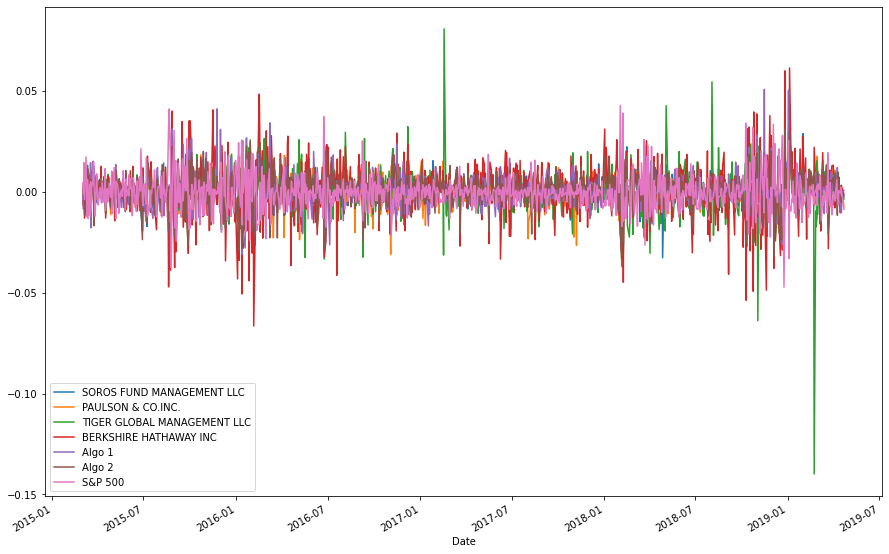

In [102]:
# Plot daily returns of all portfolios

combined_w_s_a.plot(figsize = (15,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

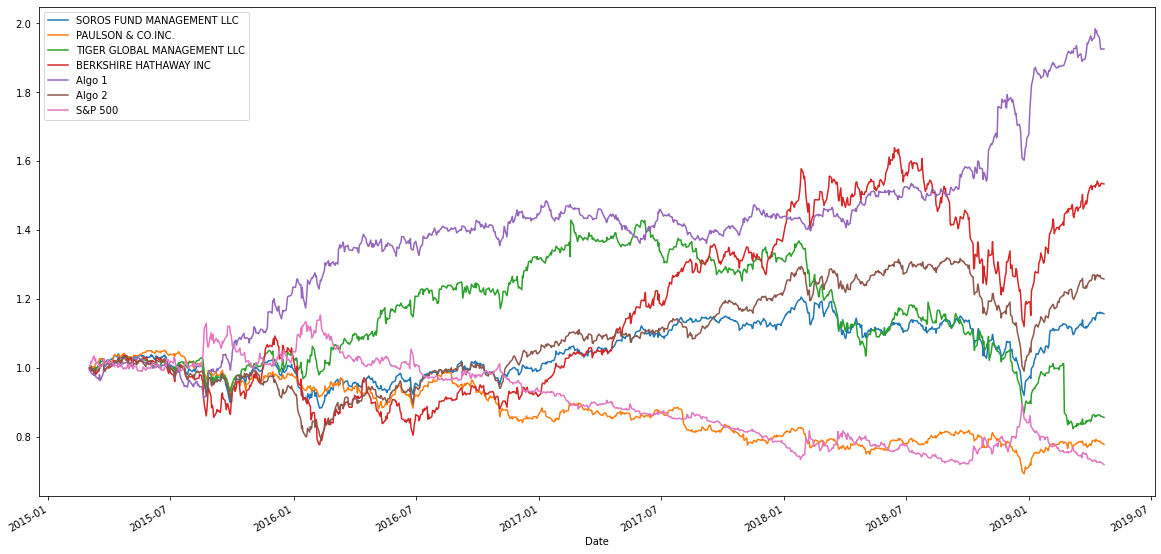

In [104]:
# Calculate cumulative returns of all portfolios
cumulitavie_returns = (1+combined_w_s_a).cumprod()
# Plot cumulative returns
cumulitavie_returns.plot(figsize = (20,10))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

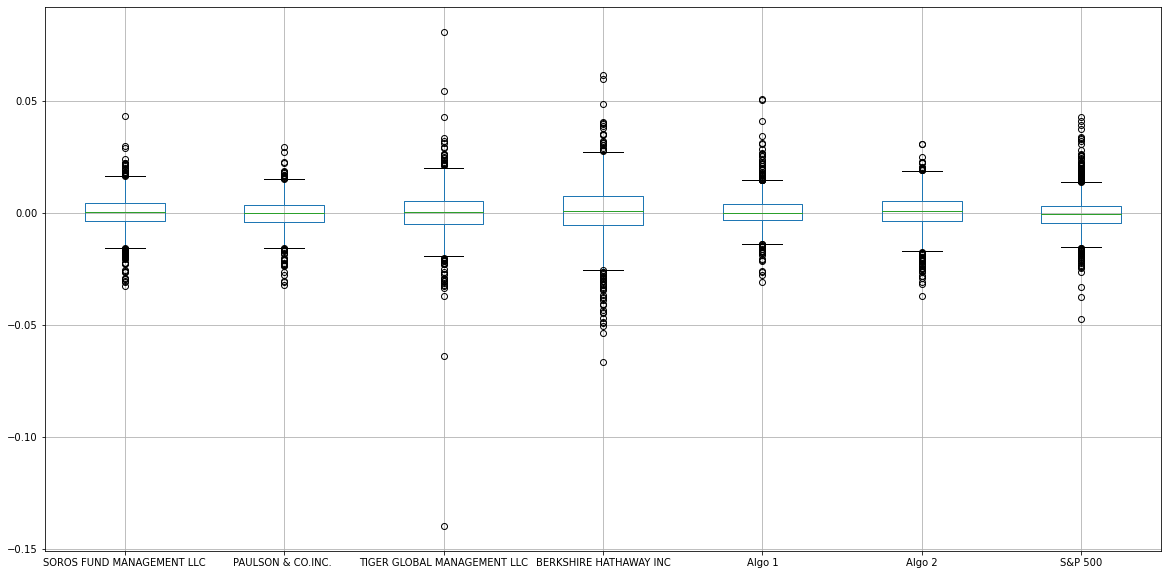

In [17]:
# Box plot to visually show risk
combined_w_s_a.boxplot(figsize = (20,10))

### Calculate Standard Deviations

In [105]:
# Calculate the daily standard deviations of all portfolios
std_dev = combined_w_s_a.std()
std_dev.sort_values()

PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
S&P 500                        0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500
snp_std_dev = combined_w_s_a['S&P 500'].std()
snp_std_dev

0.00858688974707399

In [106]:
dev = {'SOROS FUNDMANAGEMENT LLC':0.007896,
'PAULSON & CO.INC.':0.007026,
'TIGER GLOBAL MANAGEMENT LLC':0.010897,
'BERKSHIRE HATHAWAYINC':0.012919,
'Algo 1':0.007623,
'Algo 2':0.008341,
'S&P 500':0.008587,
}
#def riskier_port(std_dev):
for k,v in dev.items():
    if k == 'S&P 500':
        continue
    elif v < snp_std_dev:
        continue
    else:
        print(k,' at ',v, ' is riskier than S$P 500')

TIGER GLOBAL MANAGEMENT LLC  at  0.010897  is riskier than S$P 500
BERKSHIRE HATHAWAYINC  at  0.012919  is riskier than S$P 500


### Calculate the Annualized Standard Deviation

In [109]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = std_dev * np.sqrt(252)
annual_std.sort_values(ascending = False)

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P 500                        0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

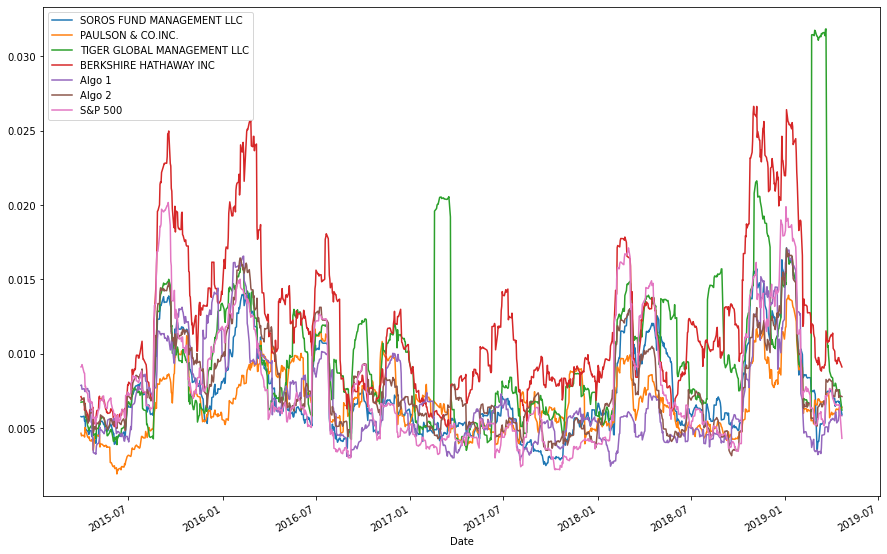

In [110]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
day_rolling21 = combined_w_s_a.rolling(window=21).std().plot(figsize = (15,10))

### Calculate and plot the correlation

<AxesSubplot:>

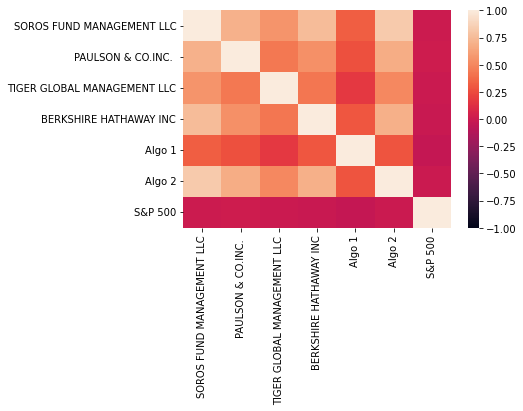

In [23]:
# Calculate the correlation
#combined_w_s_a.corr().plot(figsize = (20,10))
# Display de correlation matrix
import seaborn as sns
sns.heatmap(combined_w_s_a.corr(), vmin=-1, vmax = 1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Beta Trend'}, xlabel='Date'>

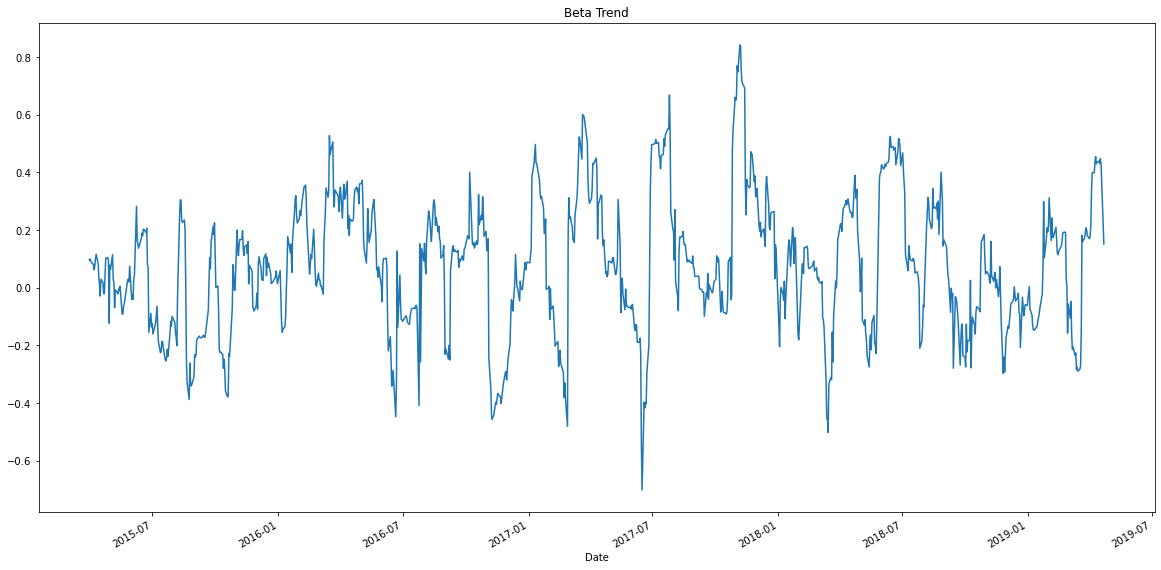

In [111]:
# Calculate covariance of a single portfolio
# Calculate variance of S&P 500
# Computing beta
# Plot beta trend by calaculating rolling beta and using 
rolling_covariance = combined_w_s_a['SOROS FUND MANAGEMENT LLC'].rolling(window = 21).cov(combined_w_s_a['S&P 500'])
rolling_variance= variance = combined_w_s_a['S&P 500'].rolling(window = 21).var()
rolling_beta = rolling_covariance/rolling_variance
rolling_beta.plot(title = 'Beta Trend',figsize= (20,10))


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

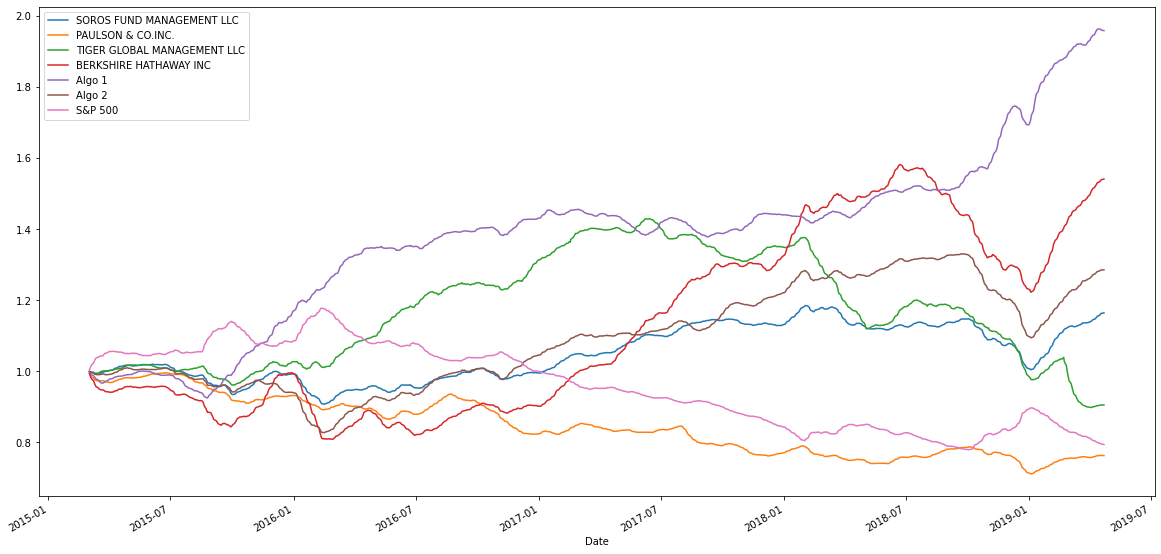

In [112]:
# Use `ewm` to calculate the rolling window
portfolio_ewm = combined_w_s_a.ewm(span = 21,adjust = False).mean()
(1+portfolio_ewm).cumprod().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratio
#sharpe_ratio = (combined_w_s_a.mean()*252)/annual_std
sharpe_ratio = (combined_w_s_a.mean()*252)/(combined_w_s_a.std()*np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:>

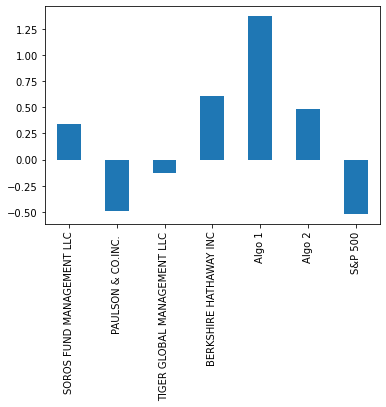

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!
Algorithm 1 performed better than all the whales portfolios, while 2 was only beaten by Berkshire Hathaway.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [44]:
# Reading data from 1st stock
alibaba= Path('C:/Users/MOMO/Desktop/Pandas_Homework/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/ALI.csv')
alibaba_data = pd.read_csv(alibaba,index_col =  'Date', parse_dates = True, infer_datetime_format=True)
alibaba_data.head()

,Close
Date,
2015-03-03,81.58
2015-03-04,85.49
2015-03-05,86.10
2015-03-06,84.40
2015-03-09,82.53


In [47]:
# Reading data from 2nd stock
pg = Path('C:/Users/MOMO/Desktop/Pandas_Homework/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/PG.csv')
pg_data = pd.read_csv(pg, index_col =  'Date',parse_dates= True, infer_datetime_format=True)
pg_data.head()

,Close
Date,
2015-03-03,112.86
2015-03-04,113.82
2015-03-05,114.79
2015-03-06,112.88
2015-03-09,114.90


In [49]:
# Reading data from 3rd stock
unh= Path('C:/Users/MOMO/Desktop/Pandas_Homework/02-Homework/04-Pandas/Instructions/Starter_Code/Resources/UNH.csv')
unh_data = pd.read_csv(unh,index_col =  'Date', parse_dates= True, infer_datetime_format=True)
unh_data.head()

,Close
Date,
2015-03-03,85.16
2015-03-04,84.35
2015-03-05,84.63
2015-03-06,82.66
2015-03-09,83.09


In [52]:
# Combine all stocks in a single DataFrame
my_port = pd.concat([alibaba_data,pg_data,unh_data], axis = 'columns', join = 'inner')
my_port.head()


,Close,Close,Close
Date,,,
2015-03-03,81.58,112.86,85.16
2015-03-04,85.49,113.82,84.35
2015-03-05,86.10,114.79,84.63
2015-03-06,84.40,112.88,82.66
2015-03-09,82.53,114.90,83.09


In [32]:
# Reset Date index


In [33]:
# Reorganize portfolio data by having a column per symbol


In [56]:
# Calculate daily returns
# Drop NAs
# Display sample data
my_port_returns = my_port.pct_change()
my_port_returns.dropna(inplace = True)

my_port_returns.head()




,Close,Close,Close
Date,,,
2015-03-04,0.047928,0.008506,-0.009512
2015-03-05,0.007135,0.008522,0.003320
2015-03-06,-0.019744,-0.016639,-0.023278
2015-03-09,-0.022156,0.017895,0.005202
2015-03-10,0.005331,-0.021236,-0.018654


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [60]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_port_weighted = my_port_returns.dot(weights)
my_port_weighted = my_port_weighted.rename("Custom")
my_port_weighted.head()
# Display sample data


Date
2015-03-04    0.015641
2015-03-05    0.006326
2015-03-06   -0.019887
2015-03-09    0.000314
2015-03-10   -0.011520
Name: Custom, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [71]:
# Join your returns DataFrame to the original returns DataFrame
new_portfolios = pd.concat([whale_data_clean,algo_returns,daily_snp_returns,my_port_weighted], axis = 'columns', join='inner')
new_portfolios.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.015641
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.006326
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.019887
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.000314
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921,-0.011520


In [72]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
new_portfolios.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.015641
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.006326
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.019887
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.000314
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921,-0.011520
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.002244
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.006270
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.004825


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [78]:
# Calculate the annualized `std`
annual_std = new_portfolios.std()*(np.sqrt(252))
annual_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205148
TIGER GLOBAL MANAGEMENT LLC    0.173072
Custom                         0.164160
S&P 500                        0.136359
Algo 2                         0.132475
SOROS FUND MANAGEMENT LLC      0.125406
Algo 1                         0.121058
PAULSON & CO.INC.              0.111556
dtype: float64

### Calculate and plot rolling `std` with 21-day window

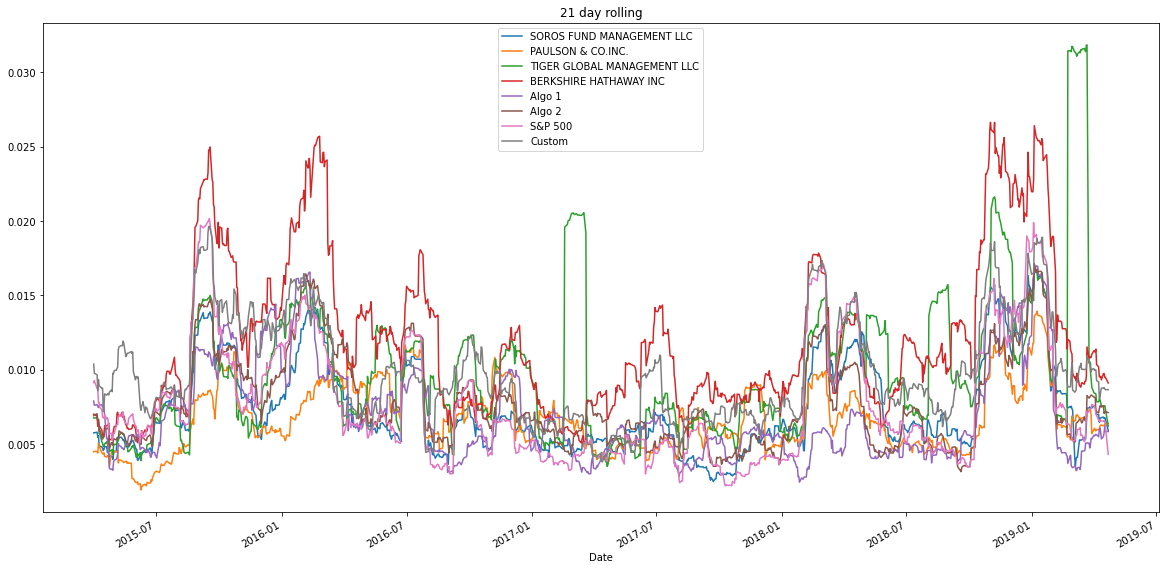

In [79]:
# Calculate rolling standard deviation

# Plot rolling standard deviation
rolling21 = new_portfolios.rolling(window = 21).std().plot(title = '21 day rolling', figsize = (20,10))

### Calculate and plot the correlation

<AxesSubplot:>

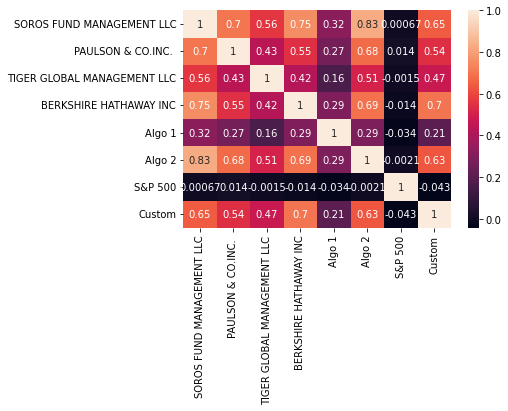

In [88]:
# Calculate and plot the correlation
corre = new_portfolios.corr()
corre
sns.heatmap(corre,annot= True)


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Custom Portfolio Beta'}, xlabel='Date'>

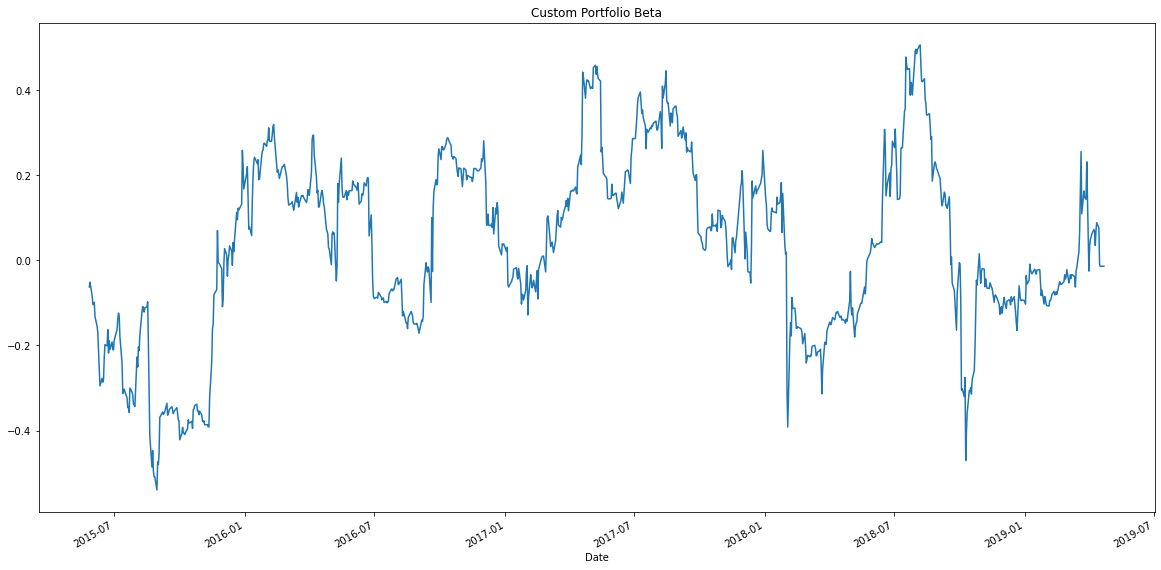

In [87]:
# Calculate and plot Beta
rolling_cov2 = new_portfolios['Custom'].rolling(window = 60).cov( new_portfolios['S&P 500'])
rolling_var2 = new_portfolios['S&P 500'].rolling(window = 60).var()
beta_2 = rolling_cov2/rolling_var2
beta_2.plot(figsize = (20,10), title = 'Custom Portfolio Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [89]:
# Calculate Annualized Sharpe Ratios
new_portfolios_sharpe = (new_portfolios.mean()*252)/annual_std
new_portfolios_sharpe

SOROS FUND MANAGEMENT LLC      0.345506
PAULSON & CO.INC.             -0.480959
TIGER GLOBAL MANAGEMENT LLC   -0.129556
BERKSHIRE HATHAWAY INC         0.614872
Algo 1                         1.374206
Algo 2                         0.486307
S&P 500                       -0.526730
Custom                         1.028435
dtype: float64

<AxesSubplot:>

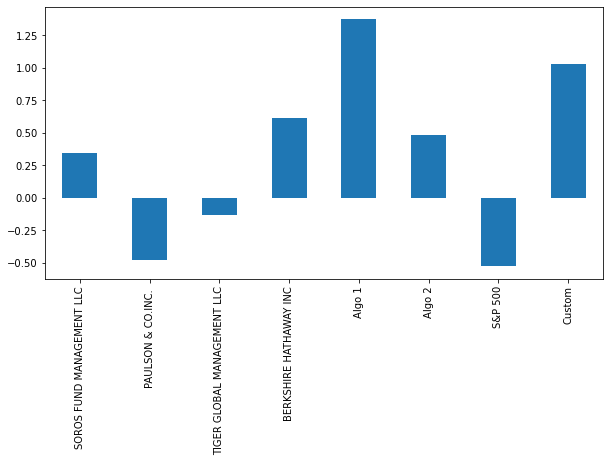

In [97]:
# Visualize the sharpe ratios as a bar plot
new_portfolios_sharpe.plot.bar(figsize = (10,5))

### How does your portfolio do?

Write your answer here!

My Custom Portfolio was only outperformed by Algorithm 1 and performed better than the rest of the portfolios and the S&P 500.